Size: 100, Time: 0.0000 ms
Size: 10100, Time: 6.2695 ms
Size: 20100, Time: 17.9622 ms
Size: 30100, Time: 21.9665 ms
Size: 40100, Time: 15.8610 ms
Size: 50100, Time: 34.2913 ms
Size: 60100, Time: 30.2675 ms
Size: 70100, Time: 58.2232 ms
Size: 80100, Time: 51.5409 ms
Size: 90100, Time: 74.3611 ms


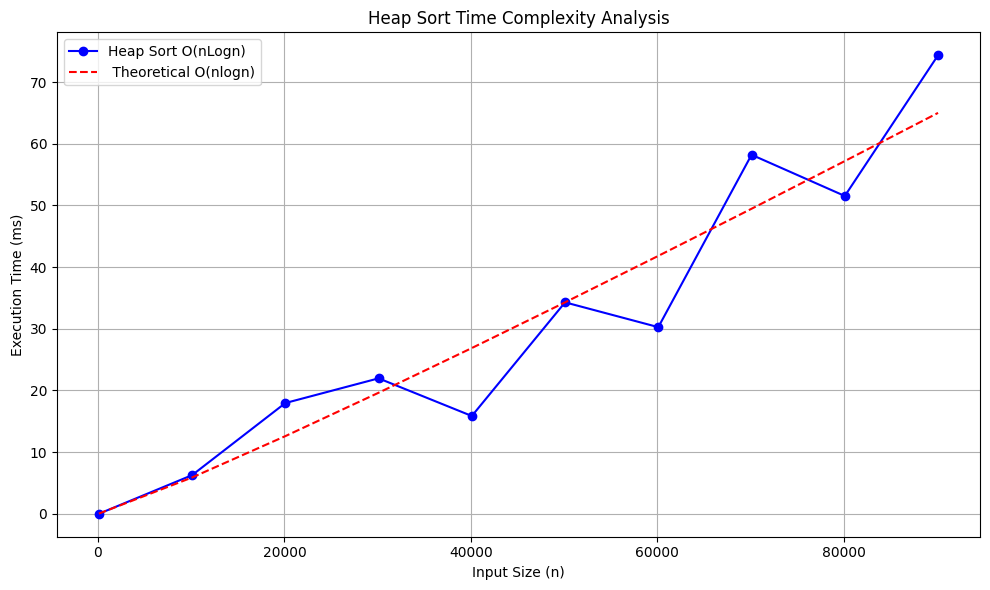

In [12]:
import matplotlib.pyplot as plt
import random
import time
import math


def heapify(arr,i,n):
    maxIdx = i         # Initialize largest as root
    left = 2 * i + 1     # Left child
    right = 2 * i + 2    # Right child

    # If left child is larger than root
    if left < n and arr[left] > arr[maxIdx]:
        maxIdx = left

    # If right child is larger than the current largest
    if right < n and arr[right] > arr[maxIdx]:
        maxIdx = right

    # If largest is not root
    if maxIdx != i:
        arr[i], arr[maxIdx] = arr[maxIdx], arr[i]  # Swap
        heapify(arr, maxIdx,n)  # Recursively heapify the affected subtree


def heapSort(arr):
    n = len(arr)

    # Step 1: Build a max-heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Step 2: Extract elements from heap one by one
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]  # Swap current root to end
        heapify(arr, i, 0)

# Input sizes to test
input_sizes = list(range(100,100001,10000))  # Up to 200000  
# Input sizes to test
# input_sizes = [100,200,300,400,500,
#                600, 700, 800, 900, 1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
execution_times = []

# Measure execution time for each input size
for size in input_sizes:
    # Generate a random array of given size
    arr = []
    for _ in range(size):
        num = random.randint(0, size)
        arr.append(num)

    # Record the time taken to sort
    start_time = time.time()
    heapSort(arr)
    end_time = time.time()

    # Store time in milliseconds
    elapsed_time = (end_time - start_time) * 1000
    execution_times.append(elapsed_time)
    print(f"Size: {size}, Time: {elapsed_time:.4f} ms")

# Extract median n and time
median_idx = len(input_sizes) // 2
median_n = input_sizes[median_idx]
median_time = execution_times[median_idx]
scaling_factor = median_time / (median_n * math.log2(median_n))

#Calculation of theoretical time
theoretical_times = [scaling_factor * n * math.log2(n) for n in input_sizes]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, marker='o',
         linestyle='-', color='blue', label='Heap Sort O(nLogn)')
plt.plot(input_sizes, theoretical_times, marker='',
         linestyle='--', color='red', label=' Theoretical O(nlogn)')
plt.title("Heap Sort Time Complexity Analysis")
plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
